In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

1. Collect the stock data
2. Preprocess the data into test train 
3. Create an stacked LSTM model
4. Predict the test data and plot the ouput
5. Predict the future 30 days and plot

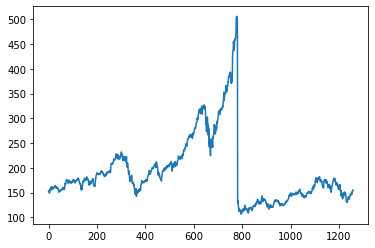

In [2]:
# df = pdr.get_data_tiingo('AAPL',  api_key='3abe5854397d36bad345d13d5a1c88febd5b2f3e')
# df.to_csv('AAPL.csv')

df1 = pd.read_csv('AAPL.csv')
df2 = df1.reset_index()['close']

plt.plot(df2)

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [4]:
def create_dataset(df, timestep):
    dataX,dataY = [],[]
    for i in range (len(df)-timestep-1):
        a = df[i:(i+timestep), 0]
        dataX.append(a)
        dataY.append(df[i+timestep,0])
    return np.array(dataX), np.array(dataY)

In [5]:
## split the dataset into train and test split
training_size = int(len(df)*0.65)
test_size = len(df)-training_size
train_data, test_data = df[0:training_size,:], df[training_size:len(df),:1]

X_train, y_train = create_dataset(train_data, 100)
X_test, y_test = create_dataset(test_data, 100)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((716, 100), (716,), (340, 100), (340,))

In [6]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [8]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

2022-07-24 23:44:01.642778: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-24 23:44:01.642870: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=64,verbose=1)

Epoch 1/200


2022-07-24 23:44:02.125003: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-24 23:44:03.748423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-24 23:44:04.006282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-24 23:44:04.143507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-24 23:44:04.256587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-24 23:44:04.404477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-24 23:44:04.631415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

12/12 [==============================] - ETA: 0s - loss: 0.0352

2022-07-24 23:44:06.689241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-24 23:44:06.782284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-24 23:44:06.882850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-24 23:44:06.986798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 5s 223ms/step - loss: 0.0352 - val_loss: 8.5109e-04
Epoch 2/200
12/12 [==============================] - 1s 67ms/step - loss: 0.0160 - val_loss: 0.0101
Epoch 3/200
12/12 [==============================] - 1s 69ms/step - loss: 0.0134 - val_loss: 6.7053e-04
Epoch 4/200
12/12 [==============================] - 1s 68ms/step - loss: 0.0107 - val_loss: 3.0157e-04
Epoch 5/200
12/12 [==============================] - 1s 68ms/step - loss: 0.0100 - val_loss: 4.3989e-04
Epoch 6/200
12/12 [==============================] - 1s 70ms/step - loss: 0.0107 - val_loss: 0.0034
Epoch 7/200
12/12 [==============================] - 1s 71ms/step - loss: 0.0089 - val_loss: 4.2509e-04
Epoch 8/200
12/12 [==============================] - 1s 75ms/step - loss: 0.0080 - val_loss: 8.9255e-04
Epoch 9/200
12/12 [==============================] - 1s 72ms/step - loss: 0.0069 - val_loss: 6.3759e-04
Epoch 10/200
12/12 [==============================] - 1s 72ms/step - loss: 0.0062 -

In [10]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

2022-07-24 23:56:01.010477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-24 23:56:01.143353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-24 23:56:01.251609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-24 23:56:01.357850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 51ms/step


In [11]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

import math
from sklearn.metrics import mean_squared_error
display(math.sqrt(mean_squared_error(y_train, train_pred)),math.sqrt(mean_squared_error(y_test, test_pred)))

238.45114125904107

155.42335030325677

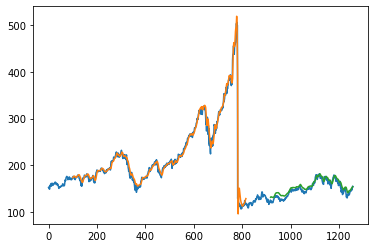

In [12]:
look_back = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:]= np.nan
trainPredictPlot[look_back:len(train_pred)+look_back,:] = train_pred

testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df)-1,:] = test_pred

plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [13]:
X_test

array([[[0.0251221 ],
        [0.02231684],
        [0.02053851],
        ...,
        [0.03554164],
        [0.04295554],
        [0.04691296]],

       [[0.02231684],
        [0.02053851],
        [0.02056356],
        ...,
        [0.04295554],
        [0.04691296],
        [0.04488416]],

       [[0.02053851],
        [0.02056356],
        [0.02444584],
        ...,
        [0.04691296],
        [0.04488416],
        [0.03428929]],

       ...,

       [[0.13332498],
        [0.14001252],
        [0.14529743],
        ...,
        [0.10427051],
        [0.10852849],
        [0.10076393]],

       [[0.14001252],
        [0.14529743],
        [0.1459737 ],
        ...,
        [0.10852849],
        [0.10076393],
        [0.11060739]],

       [[0.14529743],
        [0.1459737 ],
        [0.14116468],
        ...,
        [0.10076393],
        [0.11060739],
        [0.11571697]]])